# 데이터 시각화

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)

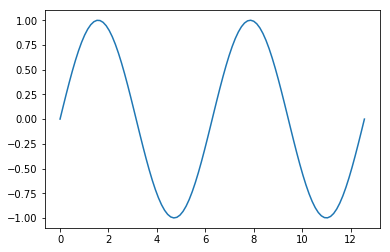

In [3]:
plt.plot(x, y)

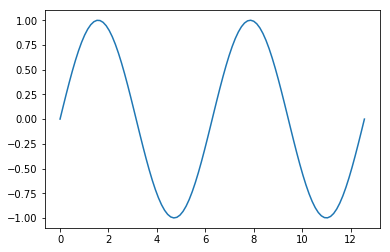

In [4]:
# Recommended
fig, ax = plt.subplots()
ax.plot(x, y)

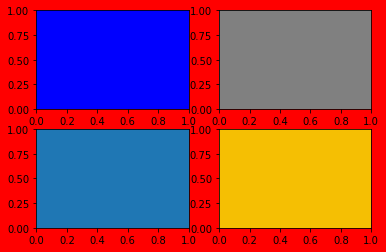

In [5]:
fig, axes = plt.subplots(2, 2)
fig.set(
    facecolor='red',
)
colors = [
    'blue',
    (0.5, 0.5, 0.5),
    'C0',
    'xkcd:golden',
]
for ax, color in zip(axes.flat, colors):
    ax.set(
        facecolor=color,
    )

## 예제

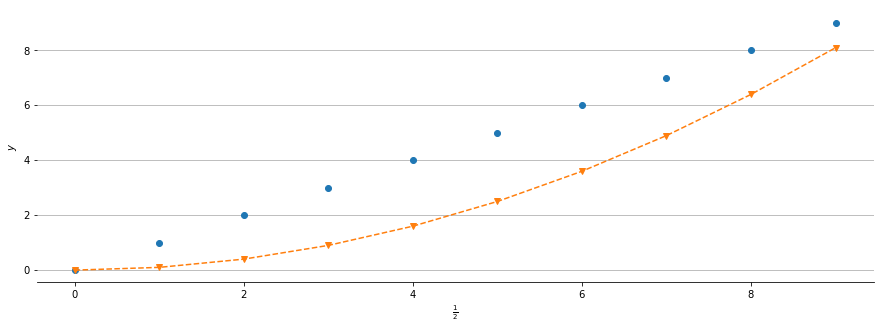

In [6]:
x = np.arange(10)
y = x ** 2 / 10

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, x, 'o', x, y, 'v--')
ax.set(
    xlabel=r'$\frac{1}{2}$',
    ylabel='$y$',
)
for p in ['left', 'right', 'top']:
    ax.spines[p].set_visible(False)
ax.grid(axis='y')

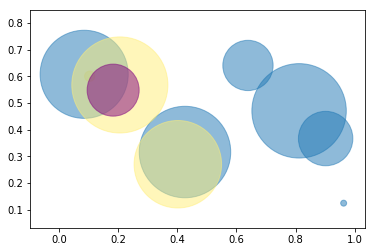

In [7]:
n = 10

x = np.random.random(n)
y = np.random.random(n)

radius = 100 * np.random.random(n)
size = radius ** 2

color = np.random.choice(['C0', '#ffee77', 'purple'], n)

fig, ax = plt.subplots()
ax.scatter(x, y, s=size, c=color, alpha=0.5)

<BarContainer object of 4 artists>

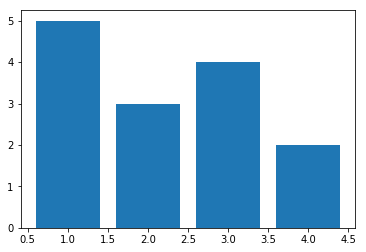

In [8]:
x = np.arange(1, 5)
y = np.array([5, 3, 4, 2])

fig, ax = plt.subplots()
ax.bar(x, y)

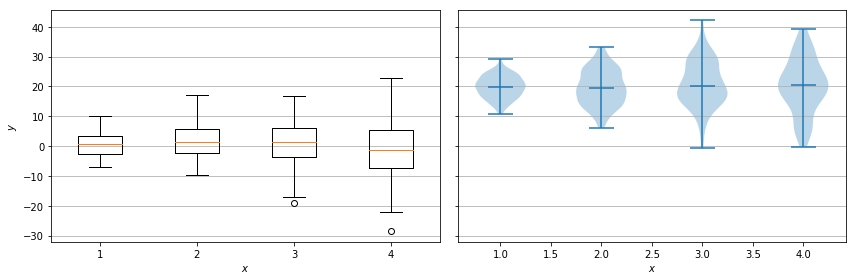

In [9]:
data1 = [np.random.normal(0, std, 100) for std in range(4, 11, 2)]
data2 = [np.random.normal(20, std, 100) for std in range(4, 11, 2)]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
axes[0].boxplot(data1)
axes[1].violinplot(data2, showmedians=True)

for i, ax in enumerate(axes):
    ax.set_xlabel('$x$')
    ax.grid(axis='y')
    if i == 0:
        ax.set_ylabel('$y$')
plt.tight_layout()

(600, 480, 3)


Text(0.5, 0.98, 'Grace Hopper')

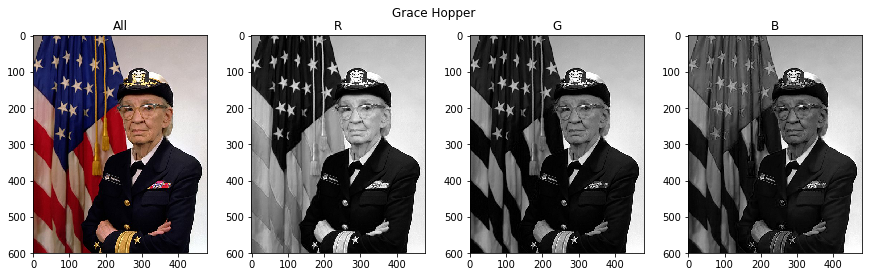

In [10]:
hopper = plt.imread('grace-hopper.jpg')
print(hopper.shape)

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes[0].imshow(hopper)
# axes[0].axis('off')

for i, ax in enumerate(axes[1:]):
    ax.imshow(hopper[:, :, i], cmap='gray', vmin=0, vmax=255)
#     ax.axis('off')

names = ['All', 'R', 'G', 'B']
for name, ax in zip(names, axes):
    ax.set_title(name)
fig.suptitle('Grace Hopper')

In [11]:
import pandas as pd

In [12]:
n_samples = 100
df = pd.DataFrame(np.random.random((n_samples, 2)), columns=['size', 'population'])
df['city_type'] = pd.Series(np.random.choice(['A', 'B', 'C'], n_samples), dtype='category')
df.head()

,size,population,city_type
0,0.912097,0.529580,B
1,0.241626,0.692420,C
2,0.240726,0.850218,B
3,0.457195,0.657068,C
4,0.851176,0.327252,C


[Text(0, 0.5, 'population'), Text(0.5, 0, 'size')]

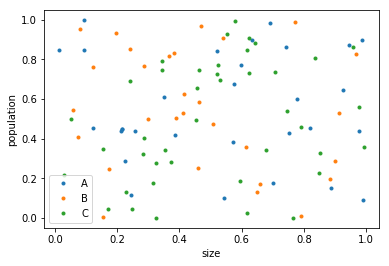

In [13]:
fig, ax = plt.subplots()
grouped = df.groupby('city_type')
for name, group in grouped:
    ax.plot(group['size'], group['population'], '.', label=name)
ax.legend()
ax.set(
    xlabel='size',
    ylabel='population',
)

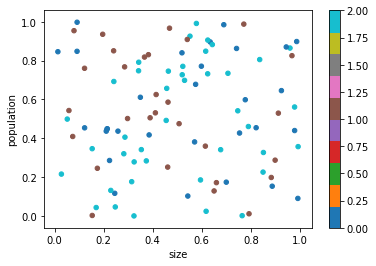

In [14]:
fig, ax = plt.subplots()
# Hmm?
df.plot.scatter(
    x='size',
    y='population',
    c=df['city_type'].cat.codes,
    colormap='tab10',
    ax=ax,
)

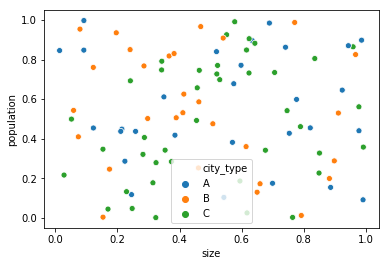

In [15]:
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='size', y='population', hue='city_type', ax=ax)